In [1]:
from utils.util import *
from matplotlib import pyplot as plt
import torch.optim as optim
import gc
# Set seed for reproducibility
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
data = Loader(data_dir="data").load_csv(file_name="Churn_Modelling.csv")
# data1 = Loader(data_dir="data/home-credit-default-risk").load_csv(file_name="bureau_balance.csv")
# data2 = Loader(data_dir="data/home-credit-default-risk").load_csv(file_name="bureau.csv")
# data3 = Loader(data_dir="data/home-credit-default-risk").load_csv(file_name="credit_card_balance.csv")
# data4 = Loader(data_dir="data/home-credit-default-risk").load_csv(file_name="HomeCredit_columns_description.csv")
# data5 = Loader(data_dir="data/home-credit-default-risk").load_csv(file_name="installments_payments.csv")
# data6 = Loader(data_dir="data/home-credit-default-risk").load_csv(file_name="POS_CASH_balance.csv")
# data7 = Loader(data_dir="data/home-credit-default-risk").load_csv(file_name="previous_application.csv")
# data8 = Loader(data_dir="data/home-credit-default-risk").load_csv(file_name="sample_submission.csv")

In [3]:
# del data #data3 data4 data5 data6 data7 data8
# gc.collect()

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
unfair_features = "Gender"
target = "Exited"

<Axes: xlabel='Gender'>

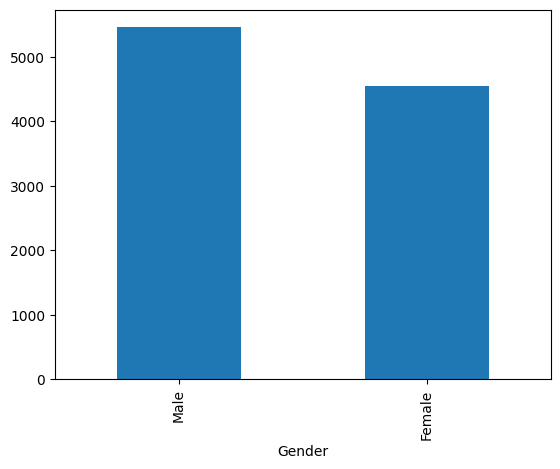

In [6]:
data[unfair_features].value_counts().plot(kind='bar')

In [7]:
count_columns = data.columns

In [8]:
for i in count_columns:
    print(i)

RowNumber
CustomerId
Surname
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


In [9]:
important_features = [
    "AMT_INCOME_TOTAL",  # Applicant's income level
    "AMT_CREDIT",  # Loan amount requested
    "AMT_ANNUITY",  # Monthly installment amount
    "AMT_GOODS_PRICE",  # Value of the house
    "DAYS_EMPLOYED",  # Employment history (longer employment = more stable)
    "NAME_INCOME_TYPE",  # Type of income (e.g., Working, Business, Pensioner)
    "NAME_EDUCATION_TYPE",  # Education level (higher education may correlate with stability)
    # "OCCUPATION_TYPE",  # Type of job (some jobs are riskier than others)
    "CNT_CHILDREN",  # Number of children (affects financial burden)
    "CNT_FAM_MEMBERS",  # Total family members (affects living expenses)
    "REGION_RATING_CLIENT",  # Risk rating of applicant's region
    "EXT_SOURCE_2", #"EXT_SOURCE_1", "EXT_SOURCE_3",  # External credit score sources
    "DAYS_BIRTH",  # Age of applicant (younger applicants might have less credit history)
    "REG_CITY_NOT_WORK_CITY",  # If applicant's work and home city differ (stability factor)
    "LIVE_REGION_NOT_WORK_REGION",  # If applicant lives far from work region
    "FLAG_EMP_PHONE",  # Verified employment phone number (adds credibility)
    # "AMT_REQ_CREDIT_BUREAU_YEAR"  # Number of credit inquiries in the past year (high = risky)
]

irrelevant_features = [
    "SK_ID_CURR",  # Just an ID, no predictive value
    "FLAG_MOBIL",  # Almost always 1 (not useful for prediction)
    "FLAG_CONT_MOBILE",  # Mobile phone continuity doesn't reflect creditworthiness
    "FLAG_PHONE",  # Having a phone number isn't a strong predictor
    "FLAG_EMAIL",  # Having an email doesn’t impact financial status
    "DAYS_REGISTRATION",  # Registration date is unrelated to loan approval
    "DAYS_ID_PUBLISH",  # Date of ID issue has no real impact
    "OWN_CAR_AGE",  # Age of the car doesn’t determine loan approval
    "WEEKDAY_APPR_PROCESS_START",  # Day of application is irrelevant
    "HOUR_APPR_PROCESS_START",  # Hour of application is not a strong factor
    "REG_REGION_NOT_LIVE_REGION",  # Registration vs. living region mismatch isn't key
    "REG_REGION_NOT_WORK_REGION",  # Registration vs. work region mismatch is minor
    "LIVE_CITY_NOT_WORK_CITY",  # Not a strong determinant for loan approval
    "FONDKAPREMONT_MODE",  # Home repair fund info isn't relevant
    "EMERGENCYSTATE_MODE",  # Emergency state info doesn’t impact approval
    "OBS_30_CNT_SOCIAL_CIRCLE",  # Social circle observations not useful
    "DEF_30_CNT_SOCIAL_CIRCLE",  # Defaults in social circle are weak predictors
    "OBS_60_CNT_SOCIAL_CIRCLE",  # Same as above, for 60 days
    "DEF_60_CNT_SOCIAL_CIRCLE",  # Same as above, for 60 days
    "DAYS_LAST_PHONE_CHANGE",  # Changing phone doesn't impact loan approval
    "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4",  
    "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7",  
    "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10",  
    "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13",  
    "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16",  
    "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19",  
    "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21",  # Document flags have little effect on approval
    "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG",  
    "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG",  
    "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG",  
    "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG",  
    "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE",  
    "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE",  
    "FLOORSMAX_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE",  
    "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE",  
    "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI",  
    "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI",  
    "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI",  
    "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI",  
    "TOTALAREA_MODE",# "HOUSETYPE_MODE", "TOTALAREA_MODE", "WALLSMATERIAL_MODE",  # Property features not always available
    "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",  
    "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",  
    "AMT_REQ_CREDIT_BUREAU_QRT"  # Frequency of credit bureau inquiries isn't a strong factor
]

unfairness_risk_features = [
    "CODE_GENDER",  # Gender bias (e.g., females may have different approval rates)
    "FLAG_OWN_CAR",  # Owning a car might not be a fair creditworthiness factor
    "FLAG_OWN_REALTY",  # Homeownership may favor wealthier applicants
    "NAME_FAMILY_STATUS",  # Family status might introduce bias (e.g., single vs. married)
    "NAME_HOUSING_TYPE",  # Housing type may reflect economic background
    "REGION_POPULATION_RELATIVE",  # Population density may be a proxy for economic status
    "ORGANIZATION_TYPE",  # Some job sectors might be unfairly penalized
    "DAYS_BIRTH",  # Age-based discrimination (older/younger applicants may be treated unfairly)
    "OCCUPATION_TYPE",  # Some jobs may be historically underpaid but still creditworthy
    "REGION_RATING_CLIENT_W_CITY",  # Regional bias based on location
    "WALLSMATERIAL_MODE",  # Type of house construction could introduce socioeconomic bias
    "HOUSETYPE_MODE"  # House type may unfairly impact approval chances
]

target = ["TARGET"]


In [10]:
data = data.drop(columns=["RowNumber", "CustomerId", "Surname", "Geography"]) # drop unuseage column
# data = data[list(set(important_features + unfairness_risk_features + target))] # reorder columns
# Identify columns with more than 10,000 missing values

# cols_to_drop = [col for col in data.columns if data[col].isnull().sum() > 10000] + ["SK_ID_CURR"]
# Drop those columns
# data = data.drop(columns=cols_to_drop)
# data = data[data["Gender"] != "Gender"] # drop rows with unknown
data = data.dropna() # drop rows with missing values
data = data.drop_duplicates() # drop duplicates
data = data.reset_index(drop=True)

In [11]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode categorical columns
categorical_columns = list(data.select_dtypes(include=['object']).columns)
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

    # Reindex rows
    data = data.reset_index(drop=True)

data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Prepare the data
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy * 100:.2f}%')

Confusion Matrix:
[[1511   96]
 [ 214  179]]
Accuracy: 84.50%


/home/athip/psu/32/pitchchaya/fairness/env/pytorch/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [01:15:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [21]:
1511/(1511 + 96)*100

94.0261356565028

In [23]:
179/(214 + 179)*100

45.5470737913486

In [153]:
data[data['Gender'] == 0]['Exited'].value_counts()

Exited
0    3404
1    1139
Name: count, dtype: int64

In [154]:
data[data['Gender'] == 1]['Exited'].value_counts()

Exited
0    4559
1     898
Name: count, dtype: int64

In [155]:
3404/1139

2.9885864793678665

In [156]:
4559/898

5.0768374164810695

In [157]:
data[data['Gender'] == 0]['Exited'].value_counts()

Exited
0    3404
1    1139
Name: count, dtype: int64

In [158]:
data[data['Gender'] == 1]['Exited'].value_counts()

Exited
0    4559
1     898
Name: count, dtype: int64

In [159]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [160]:
datadrop = data.drop(columns=["Gender"]) # drop column CODE_GENDER

In [161]:
datainv = data.copy()
datainv['Gender'] = datainv['Gender'].apply(lambda x: 1 - x) #invert columns CODE_GENDER

In [162]:
DatasetD = DataSet(data=datadrop, y_col="Exited")
train_dataD, test_dataD = DatasetD.get_datasets()
train_data_DL, val_data_DL = DatasetD.get_dataloaders(batch_size=2**12)

In [163]:
DatasetL = DataSet(data=data, y_col="Exited")
train_data, test_data = DatasetL.get_datasets()
train_data_L, val_data_L = DatasetL.get_dataloaders(batch_size=round(16))

In [164]:
DatasetInvL = DataSet(data=datainv, y_col="Exited")
train_dataInv, test_dataInv = DatasetInvL.get_datasets()

In [165]:
model = NeuralNetwork(d = 16, input = 9, output = 2, drop=0.5).to(device) # 4 0.0

# Define the loss function and optimizer
# class_counts = torch.bincount(torch.argmax(train_data.y,dim=1))  # Count samples per class
# class_counts[1] = class_counts[1] * 1000
# class_weights = 1.0 / class_counts.float()  # Inverse class frequency
# class_weights = class_weights / class_weights.sum()  # Normalize
# criterion = nn.BCELoss(weight=class_weights.to(device),reduction='mean')
criterion = nn.BCELoss()
# criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1.0e-5, weight_decay=0, amsgrad=False, eps=1.0e-8, betas=(0.9, 0.999), maximize=False)
model.eval()

NeuralNetwork(
  (layer1): Linear(in_features=9, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=32, bias=True)
  (layer5): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=2, bias=True)
  (silu): SiLU()
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (normalization1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (normalization0): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (normalization3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
)

In [66]:
model.load_state_dict(torch.load("model/model_bank1.pth"))

<All keys matched successfully>

In [28]:
sum(torch.argmax(train_data.y,dim=1) == 0)

tensor(6356, device='cuda:0')

In [166]:
# Training loop
object_max = 0
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    all_loss = []
    avg_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_data_L):
        inputs, targets = inputs.to(0), targets.to(0)
    # for i, data in enumerate(train_data_DL):
    #     inputs, targets = data
    #     inputs, targets = inputs.to(device), targets.to(device)
        if inputs.size(0) == 1:
            continue
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets.float())
        # all_loss.append(criterion_T(outputs, targets.float()).item())
        all_loss.append(loss.item())
    
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    # optimizer.zero_grad()
    
    # # Forward pass
    # outputs = model(train_data.X)
    # loss = criterion(outputs, train_data.y.float())
    
    # # Backward pass and optimization
    # loss.backward()
    # optimizer.step()
    
    if (epoch+1) % 1 == 0:
        avg_loss = sum(all_loss) / len(all_loss)
        # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
        model.eval()
        with torch.no_grad():
            # Forward pass
            test_outputs = model(test_data.X)
    
            # Calculate the loss
            test_loss = criterion(test_outputs, test_data.y.float())
    
            # Calculate accuracy
            predicted = torch.argmax(test_outputs, 1)
            labels = torch.argmax(test_data.y, 1)
            accuracy = (predicted == labels).sum().item() / labels.size(0)
            accuracy_f = (predicted == labels)[DatasetL.X_test['Gender'].values == 0].sum().item() / labels[DatasetL.X_test['Gender'].values == 0].size(0)
            accuracy_m = (predicted == labels)[DatasetL.X_test['Gender'].values == 1].sum().item() / labels[DatasetL.X_test['Gender'].values == 1].size(0)
            accuracy_0 = (predicted[labels == 0] == labels[labels == 0]).sum().item() / labels[labels == 0].size(0)
            accuracy_1 = (predicted[labels == 1] == labels[labels == 1]).sum().item() / labels[labels == 1].size(0)
            # print(f'Test Accuracy for class 0: {accuracy_0 * 100:.2f}%, Test Accuracy for class 1: {accuracy_1 * 100:.2f}%')
            obj_max = ((accuracy_0 + accuracy_1)*100) / (abs(accuracy_0 - accuracy_1) * 100)
            if obj_max > object_max:
                object_max = obj_max
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
                torch.save(model.state_dict(), "model/model_bankDD1.pth")
                print(f'Test Accuracy for class 0: {accuracy_0 * 100:.2f}%, Test Accuracy for class 1: {accuracy_1 * 100:.2f}%')
                print(f"object_max: {object_max * 100:.2f}%")

                print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
                # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    
                print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Epoch [1/200], Loss: 0.7028
Test Accuracy for class 0: 29.50%, Test Accuracy for class 1: 88.80%
object_max: 199.47%
Test Loss: 0.7076, Test Accuracy: 35.71%, 47.73%
Test Loss: 0.7076, Test Accuracy: 41.15%
Epoch [2/200], Loss: 0.6935
Test Accuracy for class 0: 39.33%, Test Accuracy for class 1: 83.97%
object_max: 276.19%
Test Loss: 0.6986, Test Accuracy: 41.55%, 56.02%
Test Loss: 0.6986, Test Accuracy: 48.10%
Epoch [4/200], Loss: 0.6675
Test Accuracy for class 0: 43.56%, Test Accuracy for class 1: 82.95%
object_max: 321.16%
Test Loss: 0.6918, Test Accuracy: 47.40%, 56.02%
Test Loss: 0.6918, Test Accuracy: 51.30%
Epoch [6/200], Loss: 0.6506
Test Accuracy for class 0: 52.89%, Test Accuracy for class 1: 76.34%
object_max: 551.27%
Test Loss: 0.6810, Test Accuracy: 55.25%, 60.22%
Test Loss: 0.6810, Test Accuracy: 57.50%
Epoch [7/200], Loss: 0.6492
Test Accuracy for class 0: 57.44%, Test Accuracy for class 1: 73.03%
object_max: 836.75%
Test Loss: 0.6761, Test Accuracy: 58.26%, 63.20%
Test L

In [67]:
# 64
# Test Accuracy for class 0: 75.11%, Test Accuracy for class 1: 74.81%
# object_max: 50016.32%
# Test Loss: 0.5617, Test Accuracy: 80.00%, 69.06%
# Test Loss: 0.5617, Test Accuracy: 75.05%

#32


In [ ]:
# torch.save(model.state_dict(), 'model/model_bank1.pth')

In [72]:
# Evaluation loop
model.eval()
with torch.no_grad():
    # Forward pass
    test_outputs = model(test_data.X)

    # Calculate the loss
    test_loss = criterion(test_outputs, test_data.y.float())
    
    # Calculate accuracy
    predicted = torch.argmax(test_outputs, 1)
    labels = torch.argmax(test_data.y, 1)
    accuracy = (predicted == labels).sum().item() / labels.size(0)
    accuracy_f = (predicted == labels)[DatasetL.X_test['Gender'].values == 0].sum().item() / labels[DatasetL.X_test['Gender'].values == 0].size(0)
    accuracy_m = (predicted == labels)[DatasetL.X_test['Gender'].values == 1].sum().item() / labels[DatasetL.X_test['Gender'].values == 1].size(0)
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
    # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Test Loss: 0.5488, Test Accuracy: 80.00%, 71.05%
Test Loss: 0.5488, Test Accuracy: 75.95%


In [46]:
sum(predicted == 1)

tensor(354, device='cuda:0')

In [73]:
men_0 = predicted[DatasetL.X_test['Gender'].values == 0]
women_0 = predicted[DatasetL.X_test['Gender'].values == 1]

In [74]:
sum(men_0==1)

tensor(390, device='cuda:0')

In [75]:
sum((women_0==1))

tensor(286, device='cuda:0')

In [76]:
len(men_0[men_0 == 0])/len(men_0[men_0 == 1])

1.3205128205128205

In [77]:
len(women_0[women_0 == 0])/len(women_0[women_0 == 1])

2.8286713286713288

In [78]:
# Evaluation loop
model.eval()
with torch.no_grad():
    # Forward pass
    test_outputs = model(test_dataInv.X)

    # Calculate the loss
    test_loss = criterion(test_outputs, test_dataInv.y.float())
    
    # Calculate accuracy
    predicted = torch.argmax(test_outputs, 1)
    labels = torch.argmax(test_dataInv.y, 1)
    accuracy = (predicted == labels).sum().item() / labels.size(0)
    accuracy_f = (predicted == labels)[DatasetInvL.X_test['Gender'].values == 0].sum().item() / labels[DatasetInvL.X_test['Gender'].values == 0].size(0)
    accuracy_m = (predicted == labels)[DatasetInvL.X_test['Gender'].values == 1].sum().item() / labels[DatasetInvL.X_test['Gender'].values == 1].size(0)
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
    # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Test Loss: 0.5645, Test Accuracy: 79.23%, 70.87%
Test Loss: 0.5645, Test Accuracy: 74.65%


In [79]:
men_1 = predicted[DatasetInvL.X_test['Gender'].values == 0]
women_1 = predicted[DatasetInvL.X_test['Gender'].values == 1]

In [80]:
len(men_1[men_1 == 0])/len(men_1[men_1 == 1])

1.5347222222222223

In [81]:
len(women_1[women_1 == 0])/len(women_1[women_1 == 1])

2.302919708029197

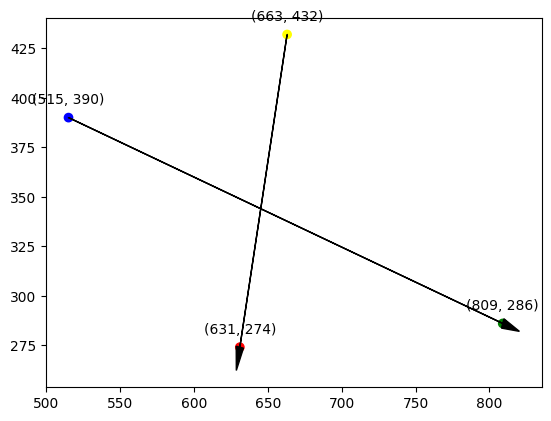

In [86]:
x = [len(men_0[men_0 == 0]), len(women_0[women_0 == 0]), len(men_1[men_1 == 0]), len(women_1[women_1 == 0])]
y = [len(men_0[men_0 == 1]), len(women_0[women_0 == 1]), len(men_1[men_1 == 1]), len(women_1[women_1 == 1])]
plt.figure(0)
plt.scatter(x, y,c=['blue', 'green', 'yellow', 'red'])
# plt.plot(x[:2], y[:2], 'k-', lw=2)
plt.arrow(x[0], y[0], x[1] - x[0], y[1] - y[0], head_width=5, head_length=12, fc='k', ec='k')
plt.arrow(x[2], y[2], x[3] - x[2], y[3] - y[2], head_width=5, head_length=12, fc='k', ec='k')
for i in range(len(x)):
    plt.annotate(f'({x[i]}, {y[i]})', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.savefig("outputs/output_with_Gender_unfairness_bank1.png")
# plt.plot(x[2:], y[2:], 'k-', lw=2)

In [ ]:
###Drop gender columns

In [128]:
model = NeuralNetwork(d = 16, input = 10, output = 2, drop=0.5).to(device) # 4 0.0

# Define the loss function and optimizer
# class_counts = torch.bincount(torch.argmax(train_data.y,dim=1))  # Count samples per class
# class_counts[1] = class_counts[1] * 1000
# class_weights = 1.0 / class_counts.float()  # Inverse class frequency
# class_weights = class_weights / class_weights.sum()  # Normalize
# criterion = nn.BCELoss(weight=class_weights.to(device),reduction='mean')
criterion = nn.BCELoss()
# criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1.0e-5, weight_decay=0, amsgrad=False, eps=1.0e-8, betas=(0.9, 0.999), maximize=False)
model.eval()

NeuralNetwork(
  (layer1): Linear(in_features=10, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=32, bias=True)
  (layer5): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=2, bias=True)
  (silu): SiLU()
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (normalization1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (normalization0): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (normalization3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
)

In [129]:
model.load_state_dict(torch.load("model/model_bank1D.pth"))

<All keys matched successfully>

In [95]:
inputs[:,3]

tensor([1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       device='cuda:0')

In [127]:
# Training loop
num_epochs = 200
object_max = 0
for epoch in range(num_epochs):
    model.train()
    # for batch_idx, (inputs, targets) in enumerate(train_loader):
    #    inputs, targets = inputs.to(0), targets.to(0)
    all_loss = []
    avg_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_data_L):
        inputs, targets = inputs.to(0), targets.to(0)
    # for i, data in enumerate(train_data_L):
    #     inputs, targets = data
    #     inputs, targets = inputs.to(device), targets.to(device)
        if inputs.size(0) == 1:
            continue
        # Zero the gradients
        optimizer.zero_grad()
    
        # Forward pass
        outputs = model(inputs[:, [i for i in range(inputs.shape[1]) if i != 3]])
        loss = criterion(outputs, targets.float())
        # all_loss.append(criterion_T(outputs, targets.float()).item())
        all_loss.append(loss.item())
    
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    # optimizer.zero_grad()
    
    # # Forward pass
    # outputs = model(train_data.X[:, [i for i in range(train_data.X.shape[1]) if i != 1]])
    # loss = criterion(outputs, train_data.y.float())
    
    # # Backward pass and optimization
    # loss.backward()
    # optimizer.step()
    
    if (epoch+1) % 1 == 0:
        avg_loss = sum(all_loss) / len(all_loss)
        # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
        model.eval()
        with torch.no_grad():
            # Forward pass
            test_outputs = model(test_data.X[:, [i for i in range(test_data.X.shape[1]) if i != 3]])
    
            # Calculate the loss
            test_loss = criterion(test_outputs, test_data.y.float())
    
            # Calculate accuracy
            predicted = torch.argmax(test_outputs, 1)
            labels = torch.argmax(test_data.y, 1)
            accuracy = (predicted == labels).sum().item() / labels.size(0)
            accuracy_f = (predicted == labels)[DatasetL.X_test['Gender'].values == 0].sum().item() / labels[DatasetL.X_test['Gender'].values == 0].size(0)
            accuracy_m = (predicted == labels)[DatasetL.X_test['Gender'].values == 1].sum().item() / labels[DatasetL.X_test['Gender'].values == 1].size(0)
            accuracy_0 = (predicted[labels == 0] == labels[labels == 0]).sum().item() / labels[labels == 0].size(0)
            accuracy_1 = (predicted[labels == 1] == labels[labels == 1]).sum().item() / labels[labels == 1].size(0)
            # print(f'Test Accuracy for class 0: {accuracy_0 * 100:.2f}%, Test Accuracy for class 1: {accuracy_1 * 100:.2f}%')
            # print(f"test_loss: {test_loss.item():.4f}")
            obj_max = ((accuracy_0 + accuracy_1)*100) / (abs(accuracy_0 - accuracy_1) * 100)
            if obj_max > object_max:
                object_max = obj_max
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
                torch.save(model.state_dict(), "model/model_bank2D.pth")
                print(f'Test Accuracy for class 0: {accuracy_0 * 100:.2f}%, Test Accuracy for class 1: {accuracy_1 * 100:.2f}%')
                print(f"object_max: {object_max * 100:.2f}%")

                print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
                # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    
                print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Epoch [1/200], Loss: 0.6934
Test Accuracy for class 0: 70.26%, Test Accuracy for class 1: 58.78%
object_max: 1124.33%
Test Loss: 0.6807, Test Accuracy: 70.50%, 64.97%
Test Loss: 0.6807, Test Accuracy: 68.00%
Epoch [2/200], Loss: 0.6758
Test Accuracy for class 0: 71.56%, Test Accuracy for class 1: 63.36%
object_max: 1644.74%
Test Loss: 0.6749, Test Accuracy: 72.33%, 67.07%
Test Loss: 0.6749, Test Accuracy: 69.95%
Epoch [4/200], Loss: 0.6444
Test Accuracy for class 0: 69.63%, Test Accuracy for class 1: 67.94%
object_max: 8121.48%
Test Loss: 0.6666, Test Accuracy: 70.59%, 67.73%
Test Loss: 0.6666, Test Accuracy: 69.30%
Epoch [5/200], Loss: 0.6383
Test Accuracy for class 0: 69.63%, Test Accuracy for class 1: 68.19%
object_max: 9574.78%
Test Loss: 0.6628, Test Accuracy: 70.41%, 68.07%
Test Loss: 0.6628, Test Accuracy: 69.35%
Epoch [9/200], Loss: 0.6143
Test Accuracy for class 0: 69.32%, Test Accuracy for class 1: 69.97%
object_max: 21337.06%
Test Loss: 0.6481, Test Accuracy: 70.68%, 67.96%


In [ ]:
# 32
# Test Accuracy for class 0: 76.85%, Test Accuracy for class 1: 76.34%
# object_max: 29722.12%
# Test Loss: 0.5724, Test Accuracy: 77.90%, 75.36%
# Test Loss: 0.5724, Test Accuracy: 76.75%

# 64
# Test Accuracy for class 0: 75.42%, Test Accuracy for class 1: 75.57%
# object_max: 99023.36%
# Test Loss: 0.5540, Test Accuracy: 75.98%, 74.81%
# Test Loss: 0.5540, Test Accuracy: 75.45%

In [ ]:
# torch.save(model.state_dict(), 'model/model_house5D.pth')

In [130]:
# Evaluation loop
model.eval()
with torch.no_grad():
    # Forward pass
    test_outputs = model(test_data.X[:, [i for i in range(test_data.X.shape[1]) if i != 3]])

    # Calculate the loss
    test_loss = criterion(test_outputs, test_data.y.float())
    
    # Calculate accuracy
    predicted = torch.argmax(test_outputs, 1)
    labels = torch.argmax(test_data.y, 1)
    accuracy = (predicted == labels).sum().item() / labels.size(0)
    accuracy_f = (predicted == labels)[DatasetL.X_test['Gender'].values == 0].sum().item() / labels[DatasetL.X_test['Gender'].values == 0].size(0)
    accuracy_m = (predicted == labels)[DatasetL.X_test['Gender'].values == 1].sum().item() / labels[DatasetL.X_test['Gender'].values == 1].size(0)
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
    # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Test Loss: 0.5724, Test Accuracy: 77.90%, 75.36%
Test Loss: 0.5724, Test Accuracy: 76.75%


In [131]:
men_0 = predicted[DatasetL.X_test['Gender'].values == 0]
women_0 = predicted[DatasetL.X_test['Gender'].values == 1]

In [132]:
len(men_0[men_0 == 0])/len(men_0[men_0 == 1])

1.7341389728096677

In [133]:
len(women_0[women_0 == 0])/len(women_0[women_0 == 1])

2.2111436950146626

In [134]:
# Evaluation loop
model.eval()
with torch.no_grad():
    # Forward pass
    test_outputs = model(test_dataInv.X[:, [i for i in range(test_data.X.shape[1]) if i != 3]])

    # Calculate the loss
    test_loss = criterion(test_outputs, test_dataInv.y.float())
    
    # Calculate accuracy
    predicted = torch.argmax(test_outputs, 1)
    labels = torch.argmax(test_dataInv.y, 1)
    accuracy = (predicted == labels).sum().item() / labels.size(0)
    accuracy_f = (predicted == labels)[DatasetInvL.X_test['Gender'].values == 0].sum().item() / labels[DatasetInvL.X_test['Gender'].values == 0].size(0)
    accuracy_m = (predicted == labels)[DatasetInvL.X_test['Gender'].values == 1].sum().item() / labels[DatasetInvL.X_test['Gender'].values == 1].size(0)
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
    # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Test Loss: 0.5724, Test Accuracy: 75.36%, 77.90%
Test Loss: 0.5724, Test Accuracy: 76.75%


In [135]:
men_1 = predicted[DatasetInvL.X_test['Gender'].values == 0]
women_1 = predicted[DatasetInvL.X_test['Gender'].values == 1]

In [136]:
len(men_1[men_1 == 0])/len(men_1[men_1 == 1])

2.2111436950146626

In [137]:
len(women_1[women_1 == 0])/len(women_1[women_1 == 1])

1.7341389728096677

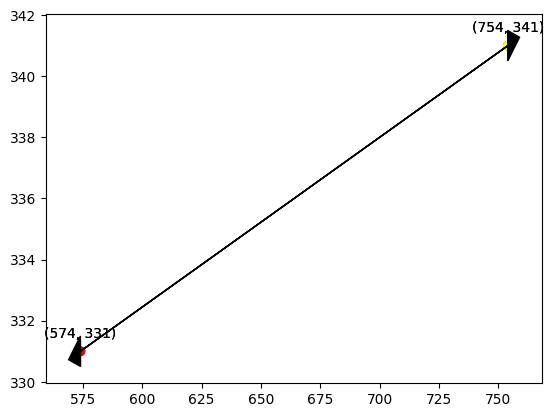

In [138]:
x = [len(men_0[men_0 == 0]), len(women_0[women_0 == 0]), len(men_1[men_1 == 0]), len(women_1[women_1 == 0])]
y = [len(men_0[men_0 == 1]), len(women_0[women_0 == 1]), len(men_1[men_1 == 1]), len(women_1[women_1 == 1])]
plt.figure(0)
plt.scatter(x, y,c=['blue', 'green', 'yellow', 'red'])
# plt.plot(x[:2], y[:2], 'k-', lw=2)
plt.arrow(x[0], y[0], x[1] - x[0], y[1] - y[0], head_width=1, head_length=5, fc='k', ec='k')
plt.arrow(x[2], y[2], x[3] - x[2], y[3] - y[2], head_width=1, head_length=5, fc='k', ec='k')
for i in range(len(x)):
    plt.annotate(f'({x[i]}, {y[i]})', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.savefig("outputs/output_with_out_Gender_unfairness_bank1.png")
# plt.plot(x[2:], y[2:], 'k-', lw=2)